In [1]:
import numpy as np
list_of_tasks = 'autoencoder curvature denoise edge2d edge3d \
keypoint2d keypoint3d colorization \
reshade rgb2depth rgb2mist rgb2sfnorm \
room_layout segment25d segment2d vanishing_point \
segmentsemantic class_1000 class_places inpainting_whole'
import os

task_list = 'autoencoder curvature denoise edge2d edge3d \
keypoint2d keypoint3d  \
reshade rgb2depth rgb2mist rgb2sfnorm \
room_layout segment25d segment2d vanishing_point_well_defined \
segmentsemantic_rb class_1000'

task_list_refined = 'autoencoder curvature denoise edge2d edge3d \
keypoint2d keypoint3d  \
reshade rgb2depth rgb2mist rgb2sfnorm \
room_layout segment25d segment2d vanishing_point \
semantic_seg class_1000'

path = '/home/kshitid20/Documents/Gemma Roig lab Dropbox/Kshitij/Multitask/CVPR_transferlearning'
os.chdir(path)
affinity_att = np.load('affinity/attribution/affinity.npy')
affinity_att_s = affinity_att[0,:,:]
affinity_att_g = affinity_att[1,:,:]
affinity_att_e = affinity_att[2,:,:]
affinity_att_s = np.delete(affinity_att_s, (7, 18,19), axis=0)
affinity_att_g = np.delete(affinity_att_g, (7, 18,19), axis=0)
affinity_att_e = np.delete(affinity_att_e, (7, 18,19), axis=0)

affinity_att_s = np.delete(affinity_att_s, (7, 18,19), axis=1)
affinity_att_g = np.delete(affinity_att_g, (7, 18,19), axis=1)
affinity_att_e = np.delete(affinity_att_e, (7, 18,19), axis=1)
task_list = task_list.split()
task_list_refined = task_list_refined.split()
print(task_list)
import pickle

with open('all_affinities.pkl', 'rb') as f:
    data = pickle.load(f)
#print(data)
    
import numpy as np
t_affinity_matrix = np.zeros((len(task_list),len(task_list)))
for i,task1 in enumerate(task_list):
    for j,task2 in enumerate(task_list):
        t_affinity_matrix[i,j] = data[task1+"__"+task2]
        
with open('win_rates_16k.pkl', 'rb') as f:
    data = pickle.load(f)
print(data['win_rates']['segmentsemantic_rb'][('class_1000',)][('edge2d',)])
#print(data['win_rates']['segmentsemantic_rb'])
import numpy as np
t_winrate_matrix = np.zeros((len(task_list),len(task_list)))
for i,task1 in enumerate(task_list):
    for j,task2 in enumerate(task_list):
        winrate = 0
        for k,task3 in enumerate(task_list):
            winrate+=data['win_rates'][task2][(task1,)][(task3,)]
        t_winrate_matrix[i,j] = winrate
print(t_winrate_matrix.shape)

['autoencoder', 'curvature', 'denoise', 'edge2d', 'edge3d', 'keypoint2d', 'keypoint3d', 'reshade', 'rgb2depth', 'rgb2mist', 'rgb2sfnorm', 'room_layout', 'segment25d', 'segment2d', 'vanishing_point_well_defined', 'segmentsemantic_rb', 'class_1000']
0.5995621110855036
(17, 17)


In [2]:
import matplotlib
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-60, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [3]:
path = '/home/kshitid20/Documents/Gemma Roig lab Dropbox/Kshitij/Multitask/CVPR_transferlearning/CVPR2020_results/normcomparison_taskonomy_5000'
os.chdir(path)

In [4]:
from scipy.stats import spearmanr,pearsonr

kernel_affinities =  np.load('kernels.npy',allow_pickle=True).item()
rdm_affinities = np.load('rdms.npy',allow_pickle=True).item()

corr_value = {}
for kernel,kernel_affinity in kernel_affinities.items():
    corr_value[kernel] = {}
    for similarity,similarity_affinity in kernel_affinity.items():
        corr_value[kernel][similarity] = {}
        for ablation,ablation_affinity in similarity_affinity.items():
            corr_value[kernel][similarity][ablation] = {}
            for f_ablation,f_ablation_affinity in ablation_affinity.items():
                corr_value_matrix = np.zeros(len(task_list))
                for iter in range(f_ablation_affinity.shape[0]):
                    #print(f_ablation_affinity.shape)
                    temp_affinity = np.delete(f_ablation_affinity[iter,:,:], (7, 18,19), axis=0)
                    temp_affinity = np.delete(temp_affinity, (7, 18,19), axis=1)
                    #print(temp_affinity.shape)
                    #print(len(task_list))
                    for j,task in enumerate(task_list):
                        temp,_ = spearmanr(t_affinity_matrix[:,j], temp_affinity[:,j])
                        corr_value_matrix[j] += temp
                corr_value[kernel][similarity][ablation][f_ablation] = corr_value_matrix/f_ablation_affinity.shape[0]
            

for rdm,rdm_affinity in rdm_affinities.items():
    corr_value[rdm] = {}
    for similarity,similarity_affinity in rdm_affinity.items():
        corr_value[rdm][similarity] = {}
        for ablation,ablation_affinity in similarity_affinity.items():
            corr_value[rdm][similarity][ablation] = {}
            for f_ablation,f_ablation_affinity in ablation_affinity.items():
                corr_value_matrix = np.zeros(len(task_list))
                for iter in range(f_ablation_affinity.shape[0]):
                    temp_affinity = np.delete(f_ablation_affinity[iter,:,:], (7, 18,19), axis=0)
                    temp_affinity = np.delete(temp_affinity, (7, 18,19), axis=1)
                    for j,task in enumerate(task_list):
                        temp,_ = spearmanr(t_affinity_matrix[:,j], temp_affinity[:,j])
                        corr_value_matrix[j] += temp
                corr_value[rdm][similarity][ablation][f_ablation] = corr_value_matrix/f_ablation_affinity.shape[0]
#print(corr_value)

In [5]:
max_corr = 0
for dist,corr_dist in corr_value.items():
    print("------------------------------------------------------------------")
    if True:#dist == 'lap' or dist == 'euclidean':
        for similarity,corr_similarity in corr_dist.items():
            for ablation,corr_ablation in corr_similarity.items():
                #if ablation == 'centered':
                #    continue
                for f_ablation,corr_f_ablation in corr_ablation.items():
                    #if f_ablation == 'centering':
                    #    continue
                    
                    if np.mean(corr_f_ablation) > max_corr:
                        max_corr = np.mean(corr_f_ablation)
                        max_combo = [dist,similarity,ablation,f_ablation]
                    print(similarity,dist,ablation,f_ablation,np.mean(corr_f_ablation))
        print("------------------------------------------------------------------")
    else:
            continue
print(max_corr,max_combo)


------------------------------------------------------------------
cka lap debiased_centered znorm 0.8600057670126875
cka lap debiased_centered None 0.8192041522491349
cka lap debiased_centered layer_norm 0.8147347174163785
cka lap debiased_centered instance_norm 0.8385236447520185
cka lap debiased_centered batch_norm 0.8543829296424453
cka lap debiased_centered centering 0.8192041522491349
cka lap debiased_centered group_norm 0.8213667820069205
cka lap default znorm 0.6943483275663207
cka lap default None 0.533881199538639
cka lap default layer_norm 0.5347462514417533
cka lap default instance_norm 0.6578719723183392
cka lap default batch_norm 0.6421568627450981
cka lap default centering 0.533881199538639
cka lap default group_norm 0.5850634371395618
spearman lap debiased_centered znorm 0.8654844290657441
spearman lap debiased_centered None 0.8331891580161477
spearman lap debiased_centered layer_norm 0.8254036908881202
spearman lap debiased_centered instance_norm 0.8470299884659748
spe

[0.6 0.7 0.7 0.8 0.9 0.8 0.8 0.9 0.8 0.9]


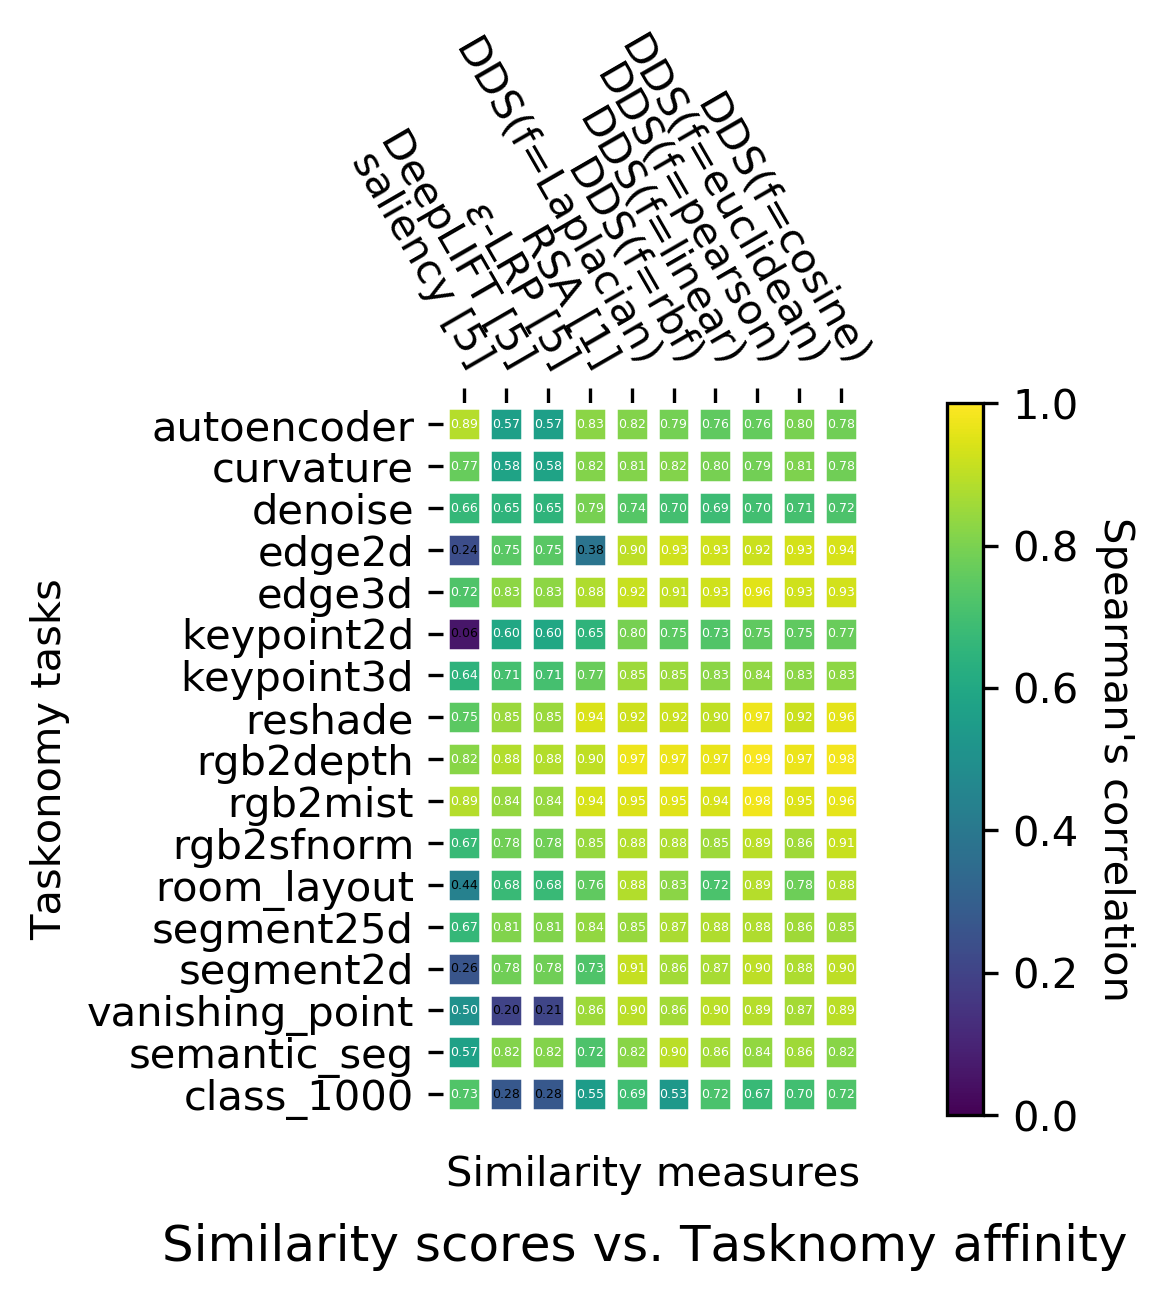

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
#per column correlation 
#per row correlation
#plt.ioff()
float_formatter = lambda x: "%.1f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
save_dir = '/home/kshitid20/Documents/Gemma Roig lab Dropbox/Kshitij/Multitask/ICLR/taskonomy_vs_similarity'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
corr_value_col = {}
corr_value_col['rbf_cka'] = {}
corr_value_col['lap_cka'] = {}
corr_value_col['linear_cka'] = {}
corr_value_col['rsa_p'] = {}
corr_value_col['rsa_e'] = {}
corr_value_col['rsa_c'] = {}
corr_value_col['att_s'] = {}
corr_value_col['att_g'] = {}
corr_value_col['att_e'] = {}
corr_value_col_matrix = np.zeros((17,10))
for j,task in enumerate(task_list):
    temp,_ = spearmanr(t_affinity_matrix[:,j], affinity_att_s[:,j])
    corr_value_col['att_s'][task]=temp
    corr_value_col_matrix[j,0] = temp    
    temp,_ = spearmanr(t_affinity_matrix[:,j], affinity_att_g[:,j])
    corr_value_col['att_g'][task]=temp
    corr_value_col_matrix[j,1] = temp    
    temp,_ = spearmanr(t_affinity_matrix[:,j], affinity_att_e[:,j])
    corr_value_col['att_e'][task]=temp
    corr_value_col_matrix[j,2] = temp
    
    corr_value_col_matrix[j,3] = corr_value['pearson']['spearman']['default']['centering'][j]
    
    corr_value_col_matrix[j,4] = corr_value['lap']['cka']['debiased_centered']['znorm'][j]
    corr_value_col_matrix[j,5] = corr_value['rbf']['cka']['debiased_centered']['znorm'][j]
    corr_value_col_matrix[j,6] = corr_value['linear']['cka']['debiased_centered']['znorm'][j]
    
    corr_value_col_matrix[j,7] = corr_value['pearson']['cka']['debiased_centered']['znorm'][j]
    corr_value_col_matrix[j,8] = corr_value['euclidean']['cka']['debiased_centered']['znorm'][j]
    corr_value_col_matrix[j,9] = corr_value['cosine']['cka']['debiased_centered']['znorm'][j]
    
fig, ax = plt.subplots()
col_labels = ['saliency [5]','DeepLIFT [5]',r'$\epsilon$' + '-LRP [5]','RSA [1]',\
              'DDS(f=Laplacian)','DDS(f=rbf)','DDS(f=linear)','DDS(f=pearson)','DDS(f=euclidean)','DDS(f=cosine)']     
row_labels = task_list_refined
im, cbar = heatmap(corr_value_col_matrix, row_labels, col_labels, ax=ax,
            cbar_kw={}, cbarlabel="Spearman's correlation",vmin=0, vmax=1,cmap='viridis')
annotate_heatmap(im,corr_value_col_matrix,fontsize=3)
fig.tight_layout()
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.ylabel('Taskonomy tasks')
plt.xlabel('Similarity measures')
plt.title("Similarity scores vs. Tasknomy affinity ", y=-0.24)

#plt.show()
plt.savefig(save_dir+'/affinity' + '.png', bbox_inches="tight")
plt.savefig(save_dir+'/affinity' + '.pdf', bbox_inches="tight")
plt.savefig(save_dir+'/affinity' + '.eps', bbox_inches="tight")
print(np.mean(corr_value_col_matrix,axis=0))

In [10]:
#Taskonomy within comparison
mean_col = 0
mean_row = 0
for j,task in enumerate(task_list):
    temp_col,_ = spearmanr(t_winrate_matrix[:,j], t_affinity_matrix[:,j])
    temp_row,_ = spearmanr(t_winrate_matrix[j,:], t_affinity_matrix[j,:])
    mean_col+=temp_col/len(task_list)
    mean_row+=temp_row/len(task_list)
print(mean_col,mean_row)

0.9886101499423302 0.6358131487889275


In [11]:
#Attribution map comparison

mean_col = 0
mean_row = 0
for j,task in enumerate(task_list):
    temp_col,_ = spearmanr(affinity_att_s[:,j], t_affinity_matrix[:,j])
    temp_row,_ = spearmanr(affinity_att_s[j,:], t_affinity_matrix[j,:])
    mean_col+=temp_col/len(task_list)
    mean_row+=temp_row/len(task_list)
print(mean_col,mean_row)
mean_col = 0
mean_row = 0
for j,task in enumerate(task_list):
    temp_col,_ = spearmanr(affinity_att_g[:,j], t_affinity_matrix[:,j])
    temp_row,_ = spearmanr(affinity_att_g[j,:], t_affinity_matrix[j,:])
    mean_col+=temp_col/len(task_list)
    mean_row+=temp_row/len(task_list)
print(mean_col,mean_row)
mean_col = 0
mean_row = 0
for j,task in enumerate(task_list):
    temp_col,_ = spearmanr(affinity_att_e[:,j], t_affinity_matrix[:,j])
    temp_row,_ = spearmanr(affinity_att_e[j,:], t_affinity_matrix[j,:])
    mean_col+=temp_col/len(task_list)
    mean_row+=temp_row/len(task_list)
print(mean_col,mean_row)

0.6052479815455596 0.4168108419838524
0.6819492502883506 0.39979815455594014
0.6823817762399077 0.39893310265282594


In [12]:
mean_col = 0
mean_row = 0
for j,task in enumerate(task_list):
    temp_col,_ = spearmanr(affinity_att_s[:,j], t_winrate_matrix[:,j])
    temp_row,_ = spearmanr(affinity_att_s[j,:], t_winrate_matrix[j,:])
    mean_col+=temp_col/len(task_list)
    mean_row+=temp_row/len(task_list)
print(mean_col,mean_row)
mean_col = 0
mean_row = 0
for j,task in enumerate(task_list):
    temp_col,_ = spearmanr(affinity_att_g[:,j], t_winrate_matrix[:,j])
    temp_row,_ = spearmanr(affinity_att_g[j,:], t_winrate_matrix[j,:])
    mean_col+=temp_col/len(task_list)
    mean_row+=temp_row/len(task_list)
print(mean_col,mean_row)
mean_col = 0
mean_row = 0
for j,task in enumerate(task_list):
    temp_col,_ = spearmanr(affinity_att_e[:,j], t_winrate_matrix[:,j])
    temp_row,_ = spearmanr(affinity_att_e[j,:], t_winrate_matrix[j,:])
    mean_col+=temp_col/len(task_list)
    mean_row+=temp_row/len(task_list)
print(mean_col,mean_row)

0.6003460207612457 0.4662629757785467
0.682237600922722 0.5996251441753173
0.6826701268742792 0.598760092272203


In [14]:
from scipy.stats import spearmanr,pearsonr

kernel_affinities =  np.load('kernels.npy',allow_pickle=True).item()
rdm_affinities = np.load('rdms.npy',allow_pickle=True).item()

corr_value = {}
for kernel,kernel_affinity in kernel_affinities.items():
    corr_value[kernel] = {}
    for similarity,similarity_affinity in kernel_affinity.items():
        corr_value[kernel][similarity] = {}
        for ablation,ablation_affinity in similarity_affinity.items():
            corr_value[kernel][similarity][ablation] = {}
            for f_ablation,f_ablation_affinity in ablation_affinity.items():
                corr_value_matrix = np.zeros(len(task_list))
                for iter in range(f_ablation_affinity.shape[0]):
                    #print(f_ablation_affinity.shape)
                    temp_affinity = np.delete(f_ablation_affinity[iter,:,:], (7, 18,19), axis=0)
                    temp_affinity = np.delete(temp_affinity, (7, 18,19), axis=1)
                    #print(temp_affinity.shape)
                    #print(len(task_list))
                    for j,task in enumerate(task_list):
                        temp,_ = spearmanr(t_winrate_matrix[:,j], temp_affinity[:,j])
                        corr_value_matrix[j] += temp
                corr_value[kernel][similarity][ablation][f_ablation] = corr_value_matrix/f_ablation_affinity.shape[0]
            

for rdm,rdm_affinity in rdm_affinities.items():
    corr_value[rdm] = {}
    for similarity,similarity_affinity in rdm_affinity.items():
        corr_value[rdm][similarity] = {}
        for ablation,ablation_affinity in similarity_affinity.items():
            corr_value[rdm][similarity][ablation] = {}
            for f_ablation,f_ablation_affinity in ablation_affinity.items():
                corr_value_matrix = np.zeros(len(task_list))
                for iter in range(f_ablation_affinity.shape[0]):
                    temp_affinity = np.delete(f_ablation_affinity[iter,:,:], (7, 18,19), axis=0)
                    temp_affinity = np.delete(temp_affinity, (7, 18,19), axis=1)
                    for j,task in enumerate(task_list):
                        temp,_ = spearmanr(t_winrate_matrix[:,j], temp_affinity[:,j])
                        corr_value_matrix[j] += temp
                corr_value[rdm][similarity][ablation][f_ablation] = corr_value_matrix/f_ablation_affinity.shape[0]
#print(corr_value)

In [15]:
max_corr = 0
for dist,corr_dist in corr_value.items():
    print("------------------------------------------------------------------")
    if True:#dist == 'lap' or dist == 'euclidean':
        for similarity,corr_similarity in corr_dist.items():
            for ablation,corr_ablation in corr_similarity.items():
                if ablation == 'centered':
                    continue
                for f_ablation,corr_f_ablation in corr_ablation.items():
                    #if f_ablation == 'centering':
                    #    continue
                    
                    if np.mean(corr_f_ablation) > max_corr:
                        max_corr = np.mean(corr_f_ablation)
                        max_combo = [dist,similarity,ablation,f_ablation]
                    print(similarity,dist,ablation,f_ablation,np.mean(corr_f_ablation))
        print("------------------------------------------------------------------")
    else:
            continue
print(max_corr,max_combo)


------------------------------------------------------------------
cka lap debiased_centered znorm 0.8601499423298732
cka lap debiased_centered None 0.8150230680507499
cka lap debiased_centered layer_norm 0.8060841983852365
cka lap debiased_centered instance_norm 0.8354959630911188
cka lap debiased_centered batch_norm 0.8529411764705883
cka lap debiased_centered centering 0.8150230680507499
cka lap debiased_centered group_norm 0.8132929642445215
cka lap default znorm 0.6916089965397925
cka lap default None 0.5392156862745099
cka lap default layer_norm 0.5275374855824683
cka lap default instance_norm 0.6620530565167245
cka lap default batch_norm 0.6301903114186852
cka lap default centering 0.5392156862745099
cka lap default group_norm 0.581603229527105
spearman lap debiased_centered znorm 0.8640426758938871
spearman lap debiased_centered None 0.8284313725490198
spearman lap debiased_centered layer_norm 0.8167531718569782
spearman lap debiased_centered instance_norm 0.8454440599769321
sp

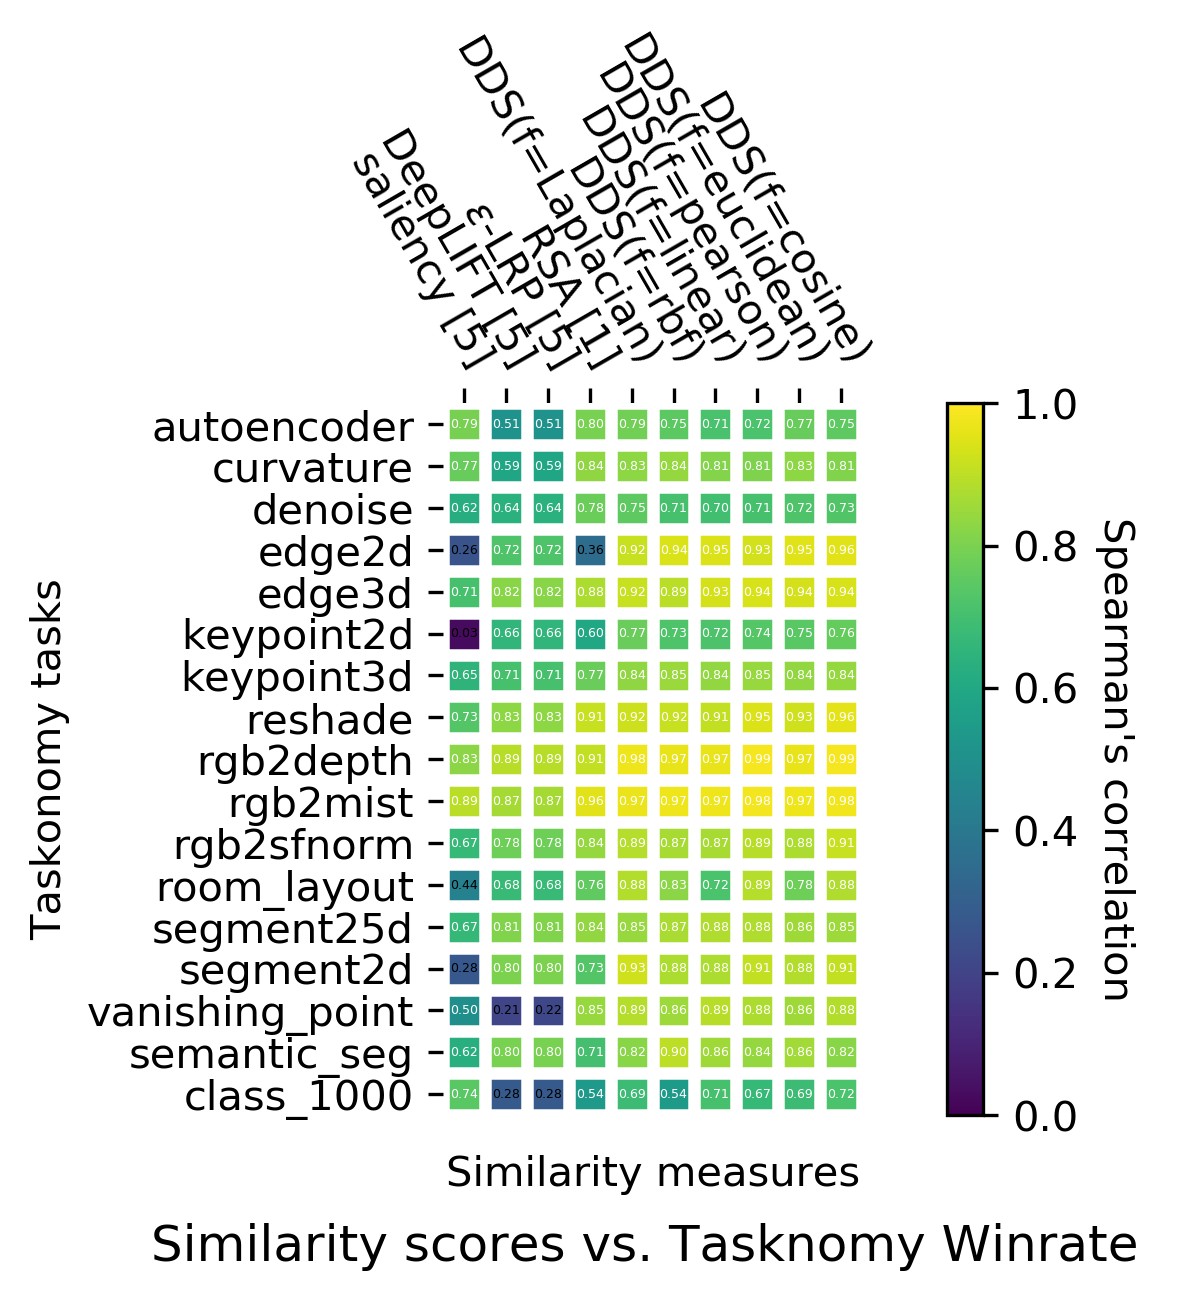

[0.6 0.7 0.7 0.8 0.9 0.8 0.8 0.9 0.9 0.9]


In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
#per column correlation 
#per row correlation
corr_value_col = {}
corr_value_col['rbf_cka'] = {}
corr_value_col['lap_cka'] = {}
corr_value_col['linear_cka'] = {}
corr_value_col['rsa_p'] = {}
corr_value_col['rsa_e'] = {}
corr_value_col['rsa_c'] = {}
corr_value_col['att_s'] = {}
corr_value_col['att_g'] = {}
corr_value_col['att_e'] = {}
corr_value_col_matrix = np.zeros((17,10))
for j,task in enumerate(task_list):
    temp,_ = spearmanr(t_winrate_matrix[:,j], affinity_att_s[:,j])
    corr_value_col['att_s'][task]=temp
    corr_value_col_matrix[j,0] = temp    
    temp,_ = spearmanr(t_winrate_matrix[:,j], affinity_att_g[:,j])
    corr_value_col['att_g'][task]=temp
    corr_value_col_matrix[j,1] = temp    
    temp,_ = spearmanr(t_winrate_matrix[:,j], affinity_att_e[:,j])
    corr_value_col['att_e'][task]=temp
    corr_value_col_matrix[j,2] = temp
    
    corr_value_col_matrix[j,3] = corr_value['pearson']['spearman']['default']['centering'][j]
    
    corr_value_col_matrix[j,4] = corr_value['lap']['cka']['debiased_centered']['znorm'][j]
    corr_value_col_matrix[j,5] = corr_value['rbf']['cka']['debiased_centered']['znorm'][j]
    corr_value_col_matrix[j,6] = corr_value['linear']['cka']['debiased_centered']['znorm'][j]
    
    corr_value_col_matrix[j,7] = corr_value['pearson']['cka']['debiased_centered']['znorm'][j]
    corr_value_col_matrix[j,8] = corr_value['euclidean']['cka']['debiased_centered']['znorm'][j]
    corr_value_col_matrix[j,9] = corr_value['cosine']['cka']['debiased_centered']['znorm'][j]
    
fig, ax = plt.subplots()
col_labels = ['saliency [5]','DeepLIFT [5]',r'$\epsilon$' + '-LRP [5]','RSA [1]',\
              'DDS(f=Laplacian)','DDS(f=rbf)','DDS(f=linear)','DDS(f=pearson)','DDS(f=euclidean)','DDS(f=cosine)'] 

row_labels = task_list_refined
im, cbar = heatmap(corr_value_col_matrix, row_labels, col_labels, ax=ax,
            cbar_kw={}, cbarlabel="Spearman's correlation",vmin=0, vmax=1,cmap='viridis')
annotate_heatmap(im,corr_value_col_matrix,fontsize=3)
fig.tight_layout()
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.ylabel('Taskonomy tasks')
plt.xlabel('Similarity measures')
plt.title("Similarity scores vs. Tasknomy Winrate ", y=-0.24)
plt.savefig(save_dir+'/winrate' + '.png', bbox_inches="tight")
plt.savefig(save_dir+'/winrate' + '.pdf', bbox_inches="tight")
plt.savefig(save_dir+'/winrate' + '.eps', bbox_inches="tight")
plt.show()

print(np.mean(corr_value_col_matrix,axis=0))

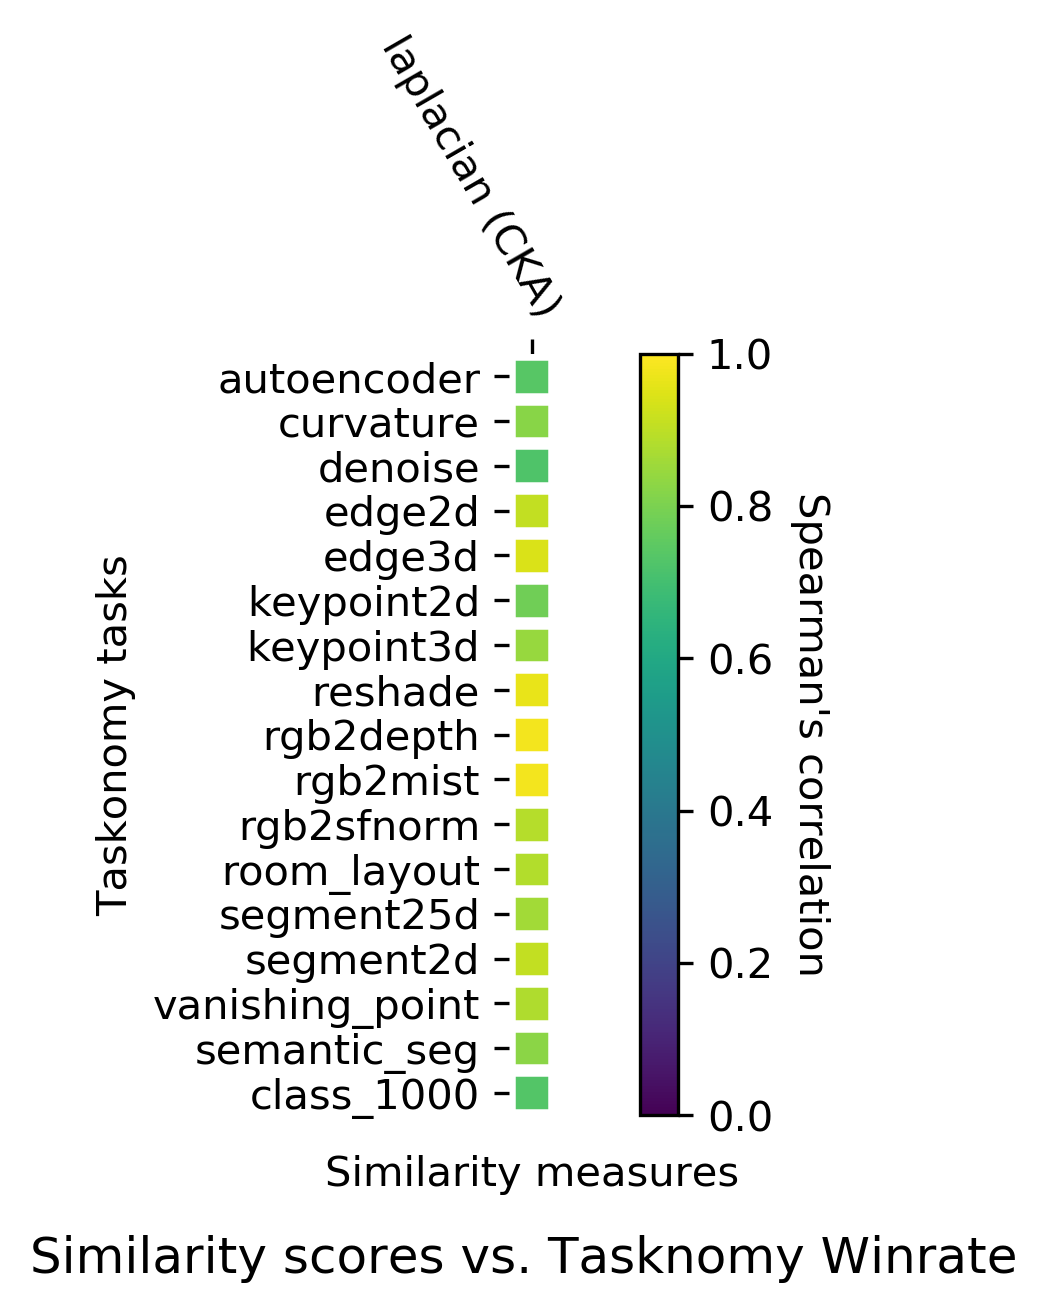

[0.6 0.7 0.7 0.8 0.9 0.9 0.9 0.9 0.9 0.9]


In [13]:
fig, ax = plt.subplots()
col_labels = ['laplacian (CKA)']      
row_labels = task_list_refined
im, cbar = heatmap(np.resize(corr_value_col_matrix[:,4],(17,1)), row_labels, col_labels, ax=ax,
            cbar_kw={}, cbarlabel="Spearman's correlation",vmin=0, vmax=1,cmap='viridis')

fig.tight_layout()
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.ylabel('Taskonomy tasks')
plt.xlabel('Similarity measures')
plt.title("Similarity scores vs. Tasknomy Winrate ", y=-0.24)

plt.show()

print(np.mean(corr_value_col_matrix,axis=0))